# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import os
import nltk
import tensorflow as tf
from keras.layers import *
from tensorflow import *
from keras.preprocessing import *
from nltk.tokenize import RegexpTokenizer, sent_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  TfidfVectorizer
import warnings
from collections import Counter
from utils.textnormalization import text_normalization
from utils.machinelearning import machine_learning_model, fit_model
from utils.deeplearning import model_compile, model_fit, lstm_, gru_, bidirectional_lstm
from utils.plot_model_changes import plot_changes
from utils.sentimentinformation import sentiment_percentage, sentiment_counts
from utils.wordcloud import wordcloud
from utils.most_frequent_word_plot import bar_plot
from utils.deeplearning_preprcosesing import  deeplearning_preprcosesing_
from utils.word_vector import word_vector_
from utils.word_2_vec import word_2_vec_
from utils.confusion_matrix import confusion_matrix_, confusion_matrix_display
from utils.generate_poitive_negative import false_true_positive, false_true_negative
from utils.performance_metrics import accuracy_score, precision_score, sensitivity_score, specificity_score, f1_score, error_rate, performance_metrics_data_frame
tokenizer = RegexpTokenizer(r'\w+')
pd.options.display.max_rows = 100
pd.options.display.max_columns =None 
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

# Download Some Packages

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

# Ignore Warnings

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

# Read Data

In [4]:
Corpus = pd.read_csv('movie.csv')
Corpus.rename(columns={'text': 'Review', 'label': 'Sentiment'}, inplace=True)
Corpus['Sentiment'] = Corpus['Sentiment'].map({0: 'Negative', 1: 'Positive'})
Corpus.index = Corpus.index + 1
Corpus.tail()

,Review,Sentiment
39996,"""Western Union"" is something of a forgotten cl...",Positive
39997,This movie is an incredible piece of work. It ...,Positive
39998,My wife and I watched this movie because we pl...,Negative
39999,"When I first watched Flatliners, I was amazed....",Positive
40000,"Why would this film be so good, but only gross...",Positive


In [5]:
Data = pd.read_csv('EnglishData.csv') # This Data Will Be Use For Word2Vec

# Sentiment Information

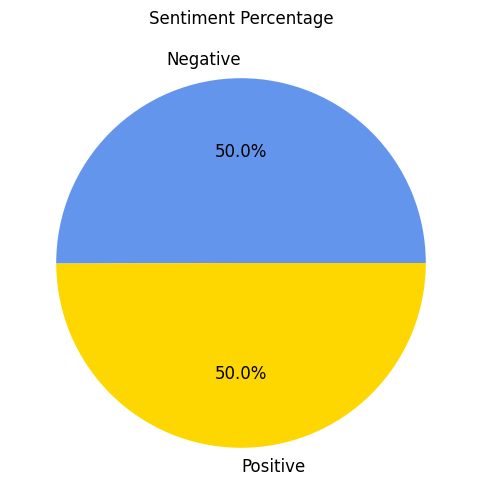

In [6]:
sentiment_percentage(Corpus, 'Sentiment', (6, 6))

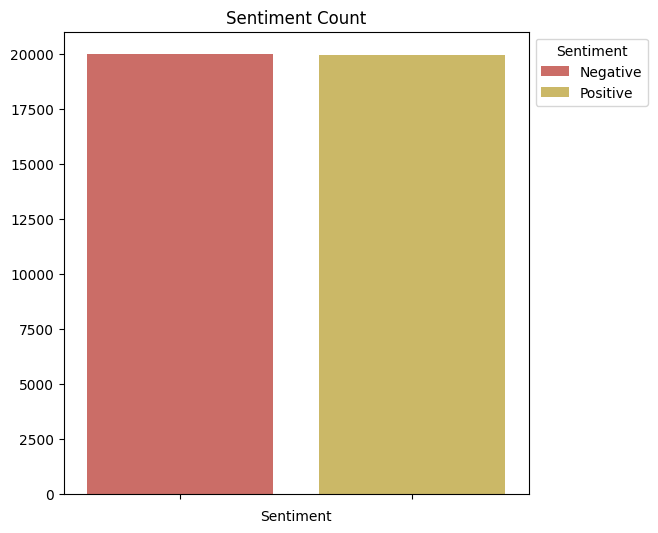

In [7]:
sentiment_counts(Corpus, 'Sentiment', (6, 6))

# Number Of Sentences

In [8]:
Corpus['NumberOfSentences'] = Corpus['Review'].apply(lambda n:len(sent_tokenize(n)))
Corpus.drop(Corpus[Corpus["NumberOfSentences"] == 0].index, inplace = True)
Corpus['NumberOfSentences'].sum()

430135

# Average Number Of Sentences

In [9]:
AverageNumberOfSentence = int(np.round(Corpus["NumberOfSentences"].mean()))
AverageNumberOfSentence

11

# Maximum Number Of Sentences

In [10]:
MaximumNumberOfSentence = Corpus["NumberOfSentences"].max()
MaximumNumberOfSentence

282

# Minimum Number Of Sentences

In [11]:
MinimumNumberOfSentence = Corpus["NumberOfSentences"].min()
MinimumNumberOfSentence

1

# Number Of Words Before Text Normalization

In [12]:
Corpus["Number of Words 1"] = Corpus['Review'].apply(lambda n:len(tokenizer.tokenize(n)))
Corpus["Number of Words 1"].sum()

9588716

# Average Number Of Words Before Text Normalization

In [13]:
AverageNaumberOfWords1 = int(np.round((Corpus["Number of Words 1"].mean())))
AverageNaumberOfWords1

240

# Maximum Number Of Word Before Text Normalization

In [14]:
MaximumNaumberOfWords1 = Corpus["Number of Words 1"].max()
MaximumNaumberOfWords1

2525

# Minimum Number Of Words Before Text Normalization

In [15]:
MimimumNaumberOfWords1 = Corpus["Number of Words 1"].min()
MimimumNaumberOfWords1

6

# Number Of Charachters Before Text Normalization

In [16]:
Corpus["Number of Charachters 1"] = Corpus['Review'].apply(lambda n:sum(chr.isalpha() for chr in n))
Corpus["Number of Charachters 1"].sum()

40959634

# Average Number Of Charachters Before Text Normalization

In [17]:
AverageNumberOfCharachters1 = int(np.round(Corpus["Number of Charachters 1"].mean()))
AverageNumberOfCharachters1

1024

# Maximum Number Of Charachters Before Text Normalization

In [18]:
MaximumNumberOfCharachters1 = Corpus['Number of Charachters 1'].max() 
MaximumNumberOfCharachters1

10862

# Minimum Number Of Charachters Before Text Normalization

In [19]:
MinimumNumberOfCharachters1 = Corpus['Number of Charachters 1'].min() 
MinimumNumberOfCharachters1

25

# Most Frequent Words Before Text Normalization

In [20]:
MostFrequentWord1 = Counter((Corpus['Review']).str.split().explode()).most_common(15)
MostFrequentWordDF1 = pd.DataFrame(MostFrequentWord1, columns=('Word', 'Count'), index=range(1, 16))
MostFrequentWordDF1

,Word,Count
1,the,455003
2,a,246023
3,and,242041
4,of,226965
5,to,209659
6,is,162528
7,in,135739
8,I,106146
9,that,101524
10,this,91013


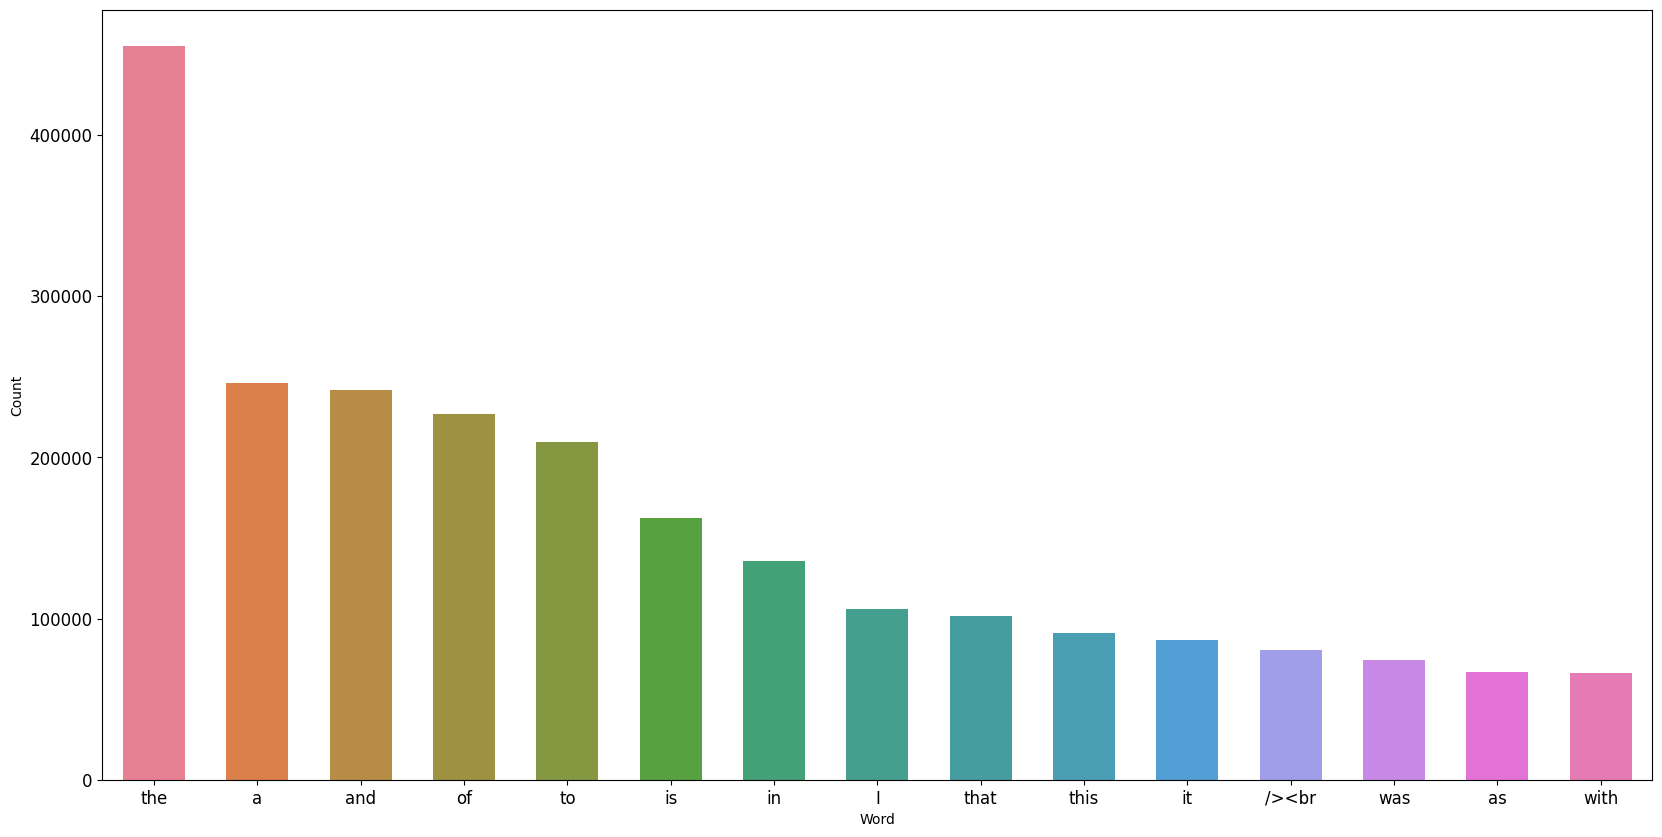

In [21]:
bar_plot(data=MostFrequentWordDF1,  x = 'Word', y='Count')

# Text Normalization

In [22]:
# Normalization techniques will be appied:
# - Converting text to lowercase.
# - Removing emojis, hashtags, emails, URLs, mentions, newline characters, and HTML tags.
# - Decreasing the number of consecutive repeated letters.
# - Removing duplicate words.
# - Expanding contractions.
# - Removing stop words.
# - Removing unicode and special characters.
# - Removing punctuation.
# - Removing single letters and duplicated letters.
# - Removing numbers.
# - Removing non-English words.
# - Removing words longer than a specified length.
# - Removing whitespace.

Corpus['Normalized_Review'] = Corpus['Review'].apply(text_normalization)
Corpus.dropna(axis=1, inplace=True)
Corpus.to_csv('Normalized Corpus.csv')
Corpus.tail()
                   

,Review,Sentiment,NumberOfSentences,Number of Words 1,Number of Charachters 1,Normalized_Review
39996,"""Western Union"" is something of a forgotten cl...",Positive,23,548,2453,western union forgoten clasic western reason ...
39997,This movie is an incredible piece of work. It ...,Positive,5,50,236,movie incredible piece work explores nok crany...
39998,My wife and I watched this movie because we pl...,Negative,7,177,870,wife watched movie plan visit sicily stromboli...
39999,"When I first watched Flatliners, I was amazed....",Positive,5,173,826,first watched flatliners amazed al necesary fe...
40000,"Why would this film be so good, but only gross...",Positive,9,144,545,film god only gros estimated award nominations...


# Number Of Unique Words

In [23]:
UniqueWords = set()
for word in Corpus['Normalized_Review'].str.split():
    UniqueWords.update(word)

len(UniqueWords)

127359

# WordCloud

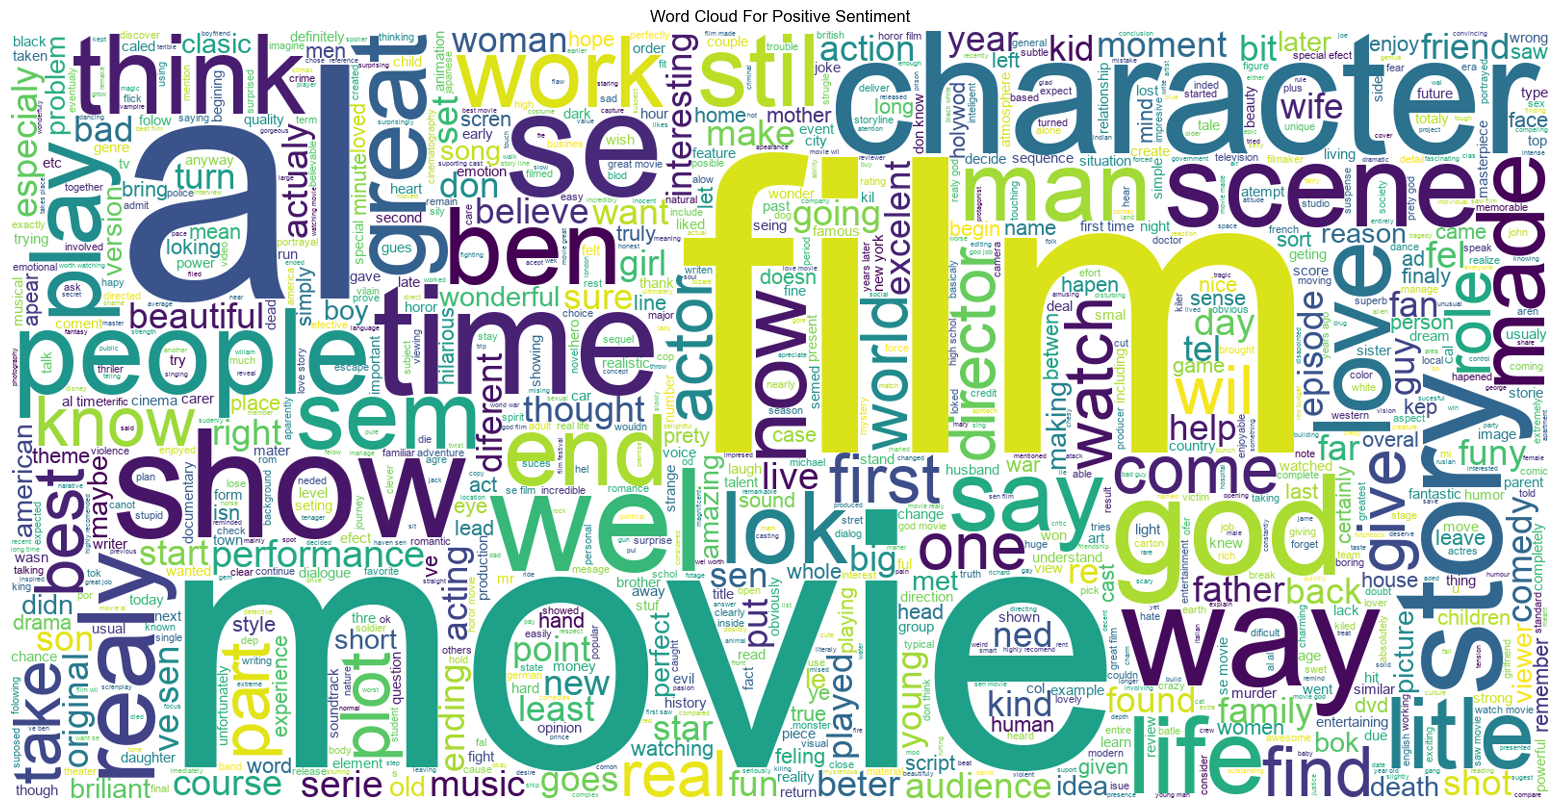

In [24]:
wordcloud(data=Corpus, target='Positive', width=1600, hieght=800, review='Normalized_Review', max_words= 1000)

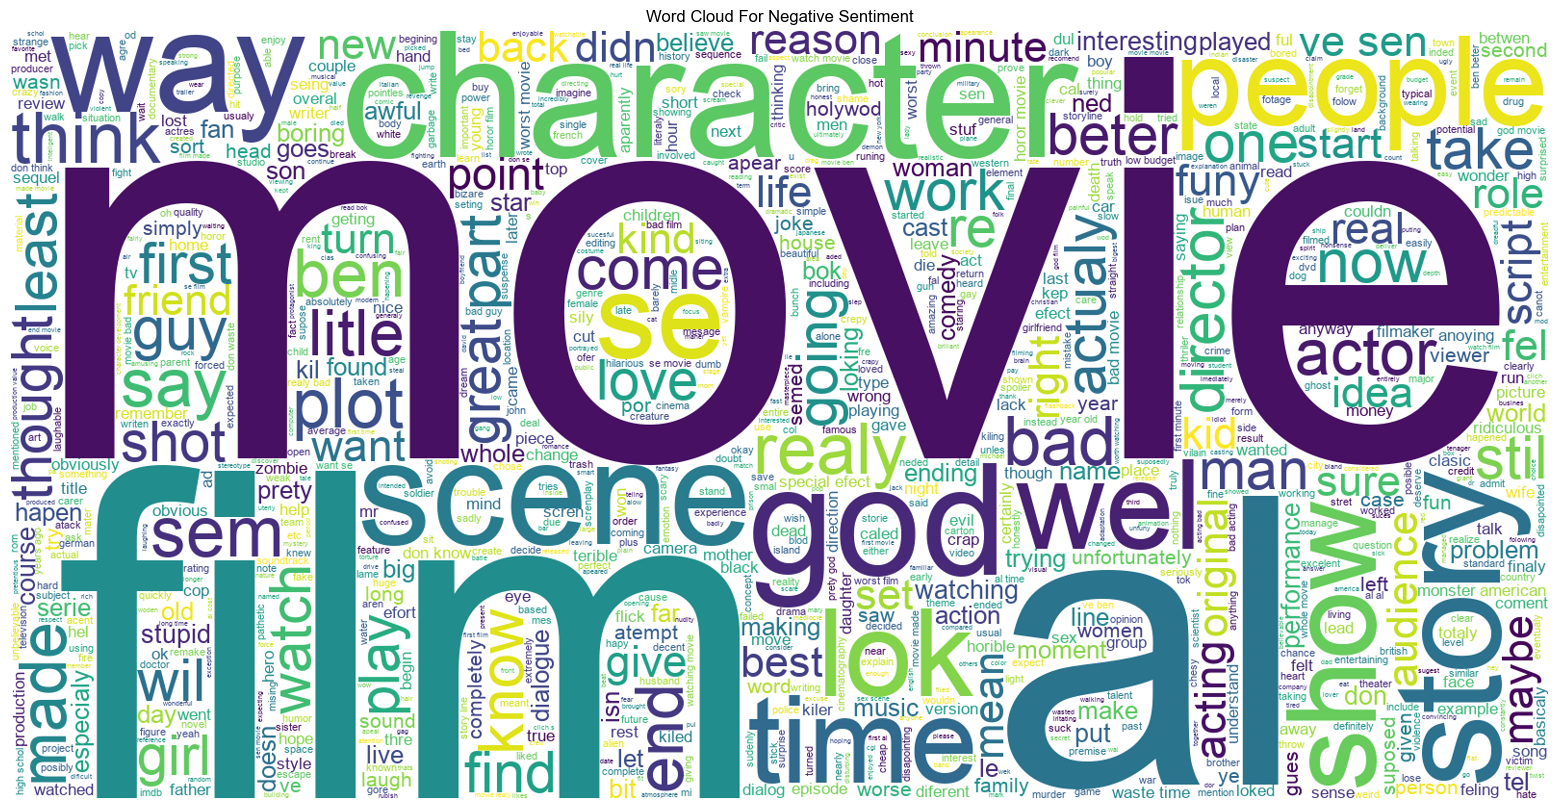

In [25]:
wordcloud(data=Corpus, target='Negative', width=1600, hieght=800, review='Normalized_Review', max_words= 1000)

# Number Of Words After Text Normalization

In [26]:
Corpus["Number of Words 2"] = Corpus["Normalized_Review"].apply(lambda n:len(tokenizer.tokenize(n)))
Corpus.drop(Corpus[Corpus["Number of Words 2"] == 0].index, inplace = True)
Corpus["Number of Words 2"].sum()

4710870

# Average Number Of Words After Text Normalization

In [27]:
AverageNaumberOfWords2 = int(np.round((Corpus["Number of Words 2"].mean())))
AverageNaumberOfWords2

118

# Maximum Number Of Word After Text Normalization

In [28]:
MaximumNaumberOfWords2 = Corpus["Number of Words 2"].max()
MaximumNaumberOfWords2

1353

# Minimum Number Of Words After Text Normalization

In [29]:
MimimumNaumberOfWords2 = Corpus["Number of Words 2"].min()
MimimumNaumberOfWords2

3

# Number Of Charachters After Text Normalization

In [30]:
Corpus["Number of Charachters 2"] = Corpus["Normalized_Review"].apply(lambda n:sum(chr.isalpha() for chr in n))
Corpus["Number of Charachters 2"].sum()

26463463

# Average Number Of Charachters After Text Normalization

In [31]:
AverageNumberOfCharachters2 = int(np.round(Corpus["Number of Charachters 2"].mean()))
AverageNumberOfCharachters2

662

# Maximum Number Of Charachters After Text Normalization

In [32]:
MaximumNumberOfCharachters2 = Corpus['Number of Charachters 2'].max() 
MaximumNumberOfCharachters2

7280

# Minimum Number Of Charachters After Text Normalization

In [33]:
MinimumNumberOfCharachters2 = Corpus['Number of Charachters 2'].min() 
MinimumNumberOfCharachters2

14

# Most Frequent Words After Text Normalization

In [34]:
MostFrequentWord2 = Counter((Corpus['Normalized_Review']).str.split().explode()).most_common(15)
MostFrequentWordDF2 = pd.DataFrame(MostFrequentWord2, columns=('Word', 'Count'), index=range(1, 16))
MostFrequentWordDF2

,Word,Count
1,movie,69425
2,film,62291
3,it,45558
4,al,37083
5,who,33485
6,like,31422
7,just,28052
8,god,25138
9,can,23163
10,i,19408


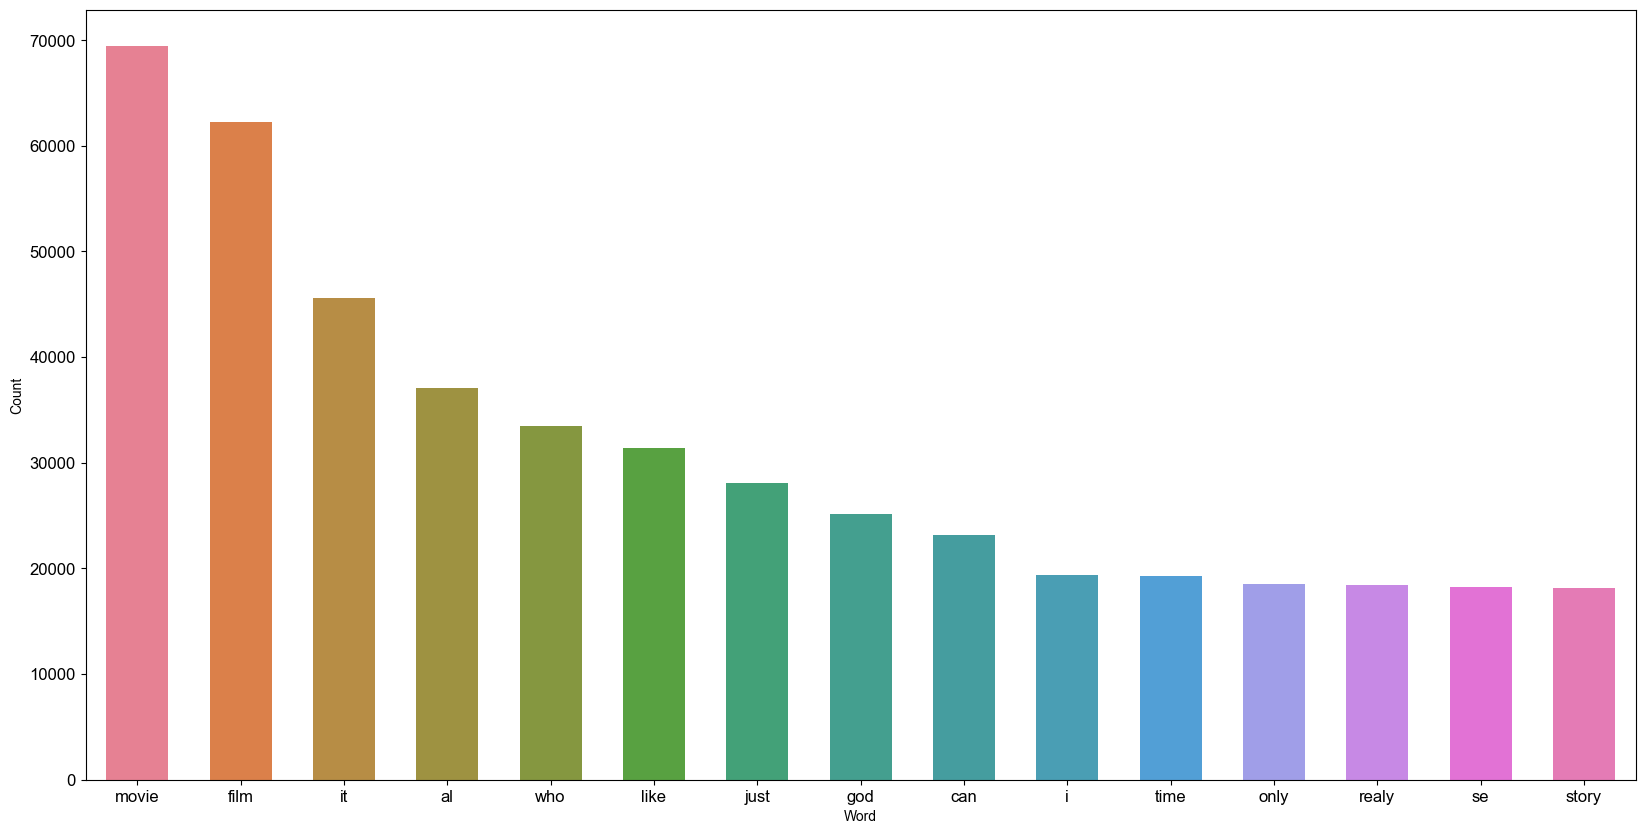

In [35]:
bar_plot(data=MostFrequentWordDF2, x = 'Word', y='Count')

# Most Frequent Words Of Each Sentiment

**1-Positive**

In [36]:
Positive = Corpus[Corpus['Sentiment'] == 'Positive']

In [37]:
PositiveMostFrequentWord = Counter((Positive['Normalized_Review']).str.split().explode()).most_common(10)
PositiveMostFrequentWordDF = pd.DataFrame(PositiveMostFrequentWord, columns=('Word', 'Count'), index=range(1, 11))
PositiveMostFrequentWordDF

,Word,Count
1,film,32864
2,movie,29886
3,it,22506
4,al,18167
5,who,17890
6,like,13892
7,god,12341
8,just,11258
9,can,11128
10,great,10244


**2-Negative**

In [38]:
Negative = Corpus[Corpus['Sentiment'] == 'Negative']

In [39]:
NegativeMostFrequentWord = Counter((Negative['Normalized_Review']).str.split().explode()).most_common(10)
NegativeMostFrequentWordDF = pd.DataFrame(NegativeMostFrequentWord, columns=('Word', 'Count'), index=range(1, 11))
NegativeMostFrequentWordDF

,Word,Count
1,movie,39539
2,film,29427
3,it,23052
4,al,18916
5,like,17530
6,just,16794
7,who,15595
8,god,12797
9,can,12035
10,bad,11474


# Split The Dataset Into Dependent (X) And Independent (y)

In [40]:
X, y = Corpus['Normalized_Review'], Corpus['Sentiment']

# Encoding Dependent Variables (Y) Into Integer

In [41]:
le = LabelEncoder()
y = le.fit_transform(y)

# Split The Dataset Into Training And Testing

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44,  stratify=y)

# Vectorizer

In [43]:
Vectorizer = TfidfVectorizer()
X_train_Vec = Vectorizer.fit_transform(X_train)
X_test_Vec = Vectorizer.transform(X_test)

# Word Mapping

In [44]:
Word_mapping = Vectorizer.vocabulary_
Word_mapping_ =pd.DataFrame((list(Word_mapping.items())), columns=['Word', 'Mapping'])
Word_mapping_.head()

,Word,Mapping
0,awip,6508
1,tries,102630
2,funy,37970
3,scary,86123
4,tense,98996


# Machine Learning

**1-Naive Bayes**

In [45]:
Algorithm = MultinomialNB(alpha= 1)
Naive_Bayes = machine_learning_model(algorithm=Algorithm)
fit_model(model=Naive_Bayes, X_train=X_train_Vec, y_train=y_train)

MultinomialNB(alpha=1)

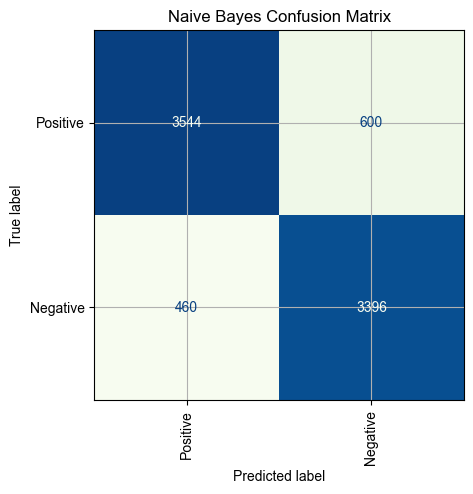

In [46]:
y_predNB = Naive_Bayes.predict(X_test_Vec)
ConfusionMatrixNB = confusion_matrix_(y_test = y_test, y_pred = y_predNB)
confusion_matrix_display(confusionmatrix = ConfusionMatrixNB, name = 'Naive Bayes')

In [47]:
False_PositiveNB, True_PositiveNB = false_true_positive(Confusin_Matrix = ConfusionMatrixNB)
False_NegativeNB, True_NegativeNB = false_true_negative(Confusin_Matrix = ConfusionMatrixNB)

In [48]:
AccuracyNB = accuracy_score(True_Positive = True_PositiveNB, True_Negative = True_NegativeNB, False_Positive =False_PositiveNB, False_Negative = False_NegativeNB)
PrecisionNB= precision_score(True_Positive = True_PositiveNB, False_Positive= False_PositiveNB)

SensitivityNB = sensitivity_score(True_Positive = True_PositiveNB,  False_Negative = False_NegativeNB)
SpecificityNB = specificity_score(True_Negative = True_NegativeNB, False_Positive = False_PositiveNB)

F1ScoreNB = f1_score(True_Positive = True_PositiveNB, False_Negative = False_NegativeNB, False_Positive = False_PositiveNB)
ErrorNB = error_rate(True_Positive = True_PositiveNB, True_Negative = True_NegativeNB, False_Positive =False_PositiveNB, False_Negative = False_NegativeNB)

In [49]:
performance_metrics_data_frame(Accuracy = AccuracyNB, Precision = PrecisionNB, Sensitivity = SensitivityNB, Specificity = SpecificityNB, F1Score = F1ScoreNB, Error = ErrorNB)

,Values
Accuracy,0.867500
Precision,0.855212
Sensitivity,0.885115
Specificity,0.849850
F1Score,0.869907
Error,0.132500


**2-Logistic Regression**

In [50]:
Algorithm = LogisticRegression()
Logistic_Regression = machine_learning_model(algorithm=Algorithm)
fit_model(model=Logistic_Regression, X_train=X_train_Vec, y_train=y_train)


LogisticRegression()

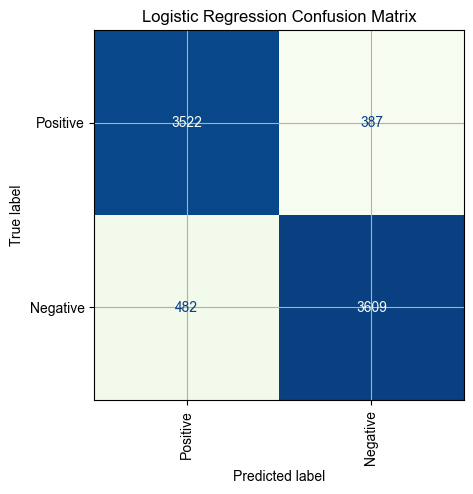

In [51]:
y_predLR = Logistic_Regression.predict(X_test_Vec)
ConfusionMatrixLR = confusion_matrix_(y_test = y_test, y_pred = y_predLR)
confusion_matrix_display(confusionmatrix = ConfusionMatrixLR, name = 'Logistic Regression')

In [52]:
False_PositiveLR, True_PositiveLR = false_true_positive(Confusin_Matrix = ConfusionMatrixLR)
False_NegativeLR, True_NegativeLR = false_true_negative(Confusin_Matrix = ConfusionMatrixLR)

In [53]:
AccuracyLR = accuracy_score(True_Positive = True_PositiveLR, True_Negative = True_NegativeLR, False_Positive =False_PositiveLR, False_Negative = False_NegativeLR)
PrecisionLR= precision_score(True_Positive = True_PositiveLR, False_Positive= False_PositiveLR)

SensitivityLR = sensitivity_score(True_Positive = True_PositiveLR,  False_Negative = False_NegativeLR)
SpecificityLR = specificity_score(True_Negative = True_NegativeLR, False_Positive = False_PositiveLR)

F1ScoreLR = f1_score(True_Positive = True_PositiveLR, False_Negative = False_NegativeLR, False_Positive = False_PositiveLR)
ErrorLR = error_rate(True_Positive = True_PositiveLR, True_Negative = True_NegativeLR, False_Positive =False_PositiveLR, False_Negative = False_NegativeLR)

In [54]:
performance_metrics_data_frame(Accuracy = AccuracyLR, Precision = PrecisionLR, Sensitivity = SensitivityLR, Specificity = SpecificityLR, F1Score = F1ScoreLR, Error = ErrorLR)

,Values
Accuracy,0.891375
Precision,0.900998
Sensitivity,0.879620
Specificity,0.903153
F1Score,0.890181
Error,0.108625


**3-Decision Tree**

In [55]:
Algorithm = DecisionTreeClassifier(criterion='gini', )
Decision_Tree = machine_learning_model(algorithm=Algorithm)
fit_model(model=Decision_Tree, X_train=X_train_Vec, y_train=y_train)

DecisionTreeClassifier()

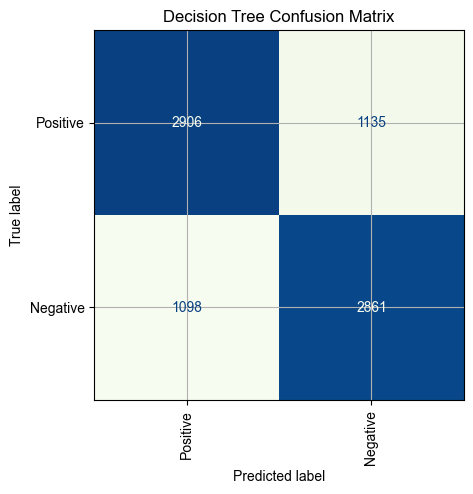

In [56]:
y_predDT = Decision_Tree.predict(X_test_Vec)
ConfusionMatrixDT = confusion_matrix_(y_test = y_test, y_pred = y_predDT)
confusion_matrix_display(confusionmatrix = ConfusionMatrixDT, name = 'Decision Tree')

In [57]:
False_PositiveDT, True_PositiveDT = false_true_positive(Confusin_Matrix = ConfusionMatrixDT)
False_NegativeDT, True_NegativeDT = false_true_negative(Confusin_Matrix = ConfusionMatrixDT)

In [58]:
AccuracyDT = accuracy_score(True_Positive = True_PositiveDT, True_Negative = True_NegativeDT, False_Positive =False_PositiveDT, False_Negative = False_NegativeDT)
PrecisionDT= precision_score(True_Positive = True_PositiveDT, False_Positive =False_PositiveDT)

SensitivityDT = sensitivity_score(True_Positive = True_PositiveDT,  False_Negative = False_NegativeDT)
SpecificityDT = specificity_score(True_Negative = True_NegativeDT, False_Positive = False_PositiveDT)

F1ScoreDT = f1_score(True_Positive = True_PositiveDT, False_Negative = False_NegativeDT, False_Positive = False_PositiveDT)
ErrorDT = error_rate(True_Positive = True_PositiveDT, True_Negative = True_NegativeDT, False_Positive =False_PositiveDT, False_Negative = False_NegativeDT)

In [59]:
performance_metrics_data_frame(Accuracy = AccuracyDT, Precision = PrecisionDT, Sensitivity = SensitivityDT, Specificity = SpecificityDT, F1Score = F1ScoreDT, Error = ErrorDT)

,Values
Accuracy,0.720875
Precision,0.719129
Sensitivity,0.725774
Specificity,0.715966
F1Score,0.722436
Error,0.279125


**4-K Nearest Neighbors**

In [60]:
Algorithm =KNeighborsClassifier(metric='minkowski', n_neighbors=5, weights='distance', p=2)
K_Nearest_Neighbors = machine_learning_model(algorithm=Algorithm)
fit_model(model=K_Nearest_Neighbors, X_train=X_train_Vec, y_train=y_train)

KNeighborsClassifier(weights='distance')

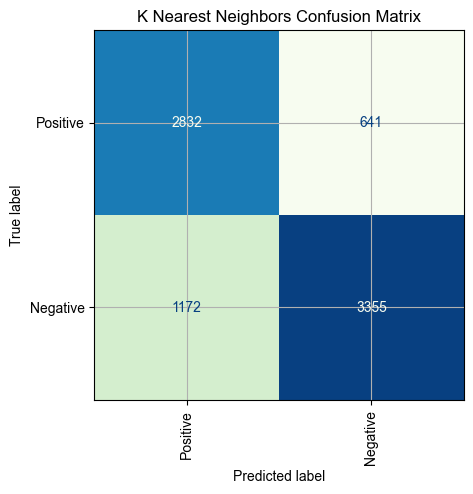

In [61]:
y_predKNN = K_Nearest_Neighbors.predict(X_test_Vec)
ConfusionMatrixKNN = confusion_matrix_(y_test = y_test, y_pred = y_predKNN)
confusion_matrix_display(confusionmatrix = ConfusionMatrixKNN, name = 'K Nearest Neighbors')

In [62]:
False_PositiveKNN, True_PositiveKNN = false_true_positive(Confusin_Matrix = ConfusionMatrixKNN)
False_NegativeKNN, True_NegativeKNN = false_true_negative(Confusin_Matrix = ConfusionMatrixKNN)

In [63]:
AccuracyKNN = accuracy_score(True_Positive = True_PositiveKNN, True_Negative = True_NegativeKNN, False_Positive =False_PositiveKNN, False_Negative = False_NegativeKNN)
PrecisionKNN= precision_score(True_Positive = True_PositiveKNN, False_Positive =False_PositiveKNN)

SensitivityKNN = sensitivity_score(True_Positive = True_PositiveKNN,  False_Negative = False_NegativeKNN)
SpecificityKNN = specificity_score(True_Negative = True_NegativeKNN, False_Positive = False_PositiveKNN)

F1ScoreKNN = f1_score(True_Positive = True_PositiveKNN, False_Negative = False_NegativeKNN, False_Positive = False_PositiveKNN)
ErrorKNN = error_rate(True_Positive = True_PositiveKNN, True_Negative = True_NegativeKNN, False_Positive =False_PositiveKNN, False_Negative = False_NegativeKNN)

In [64]:
performance_metrics_data_frame(Accuracy = AccuracyKNN, Precision = PrecisionKNN, Sensitivity = SensitivityKNN, Specificity = SpecificityKNN, F1Score = F1ScoreKNN, Error = ErrorKNN)

,Values
Accuracy,0.773375
Precision,0.815433
Sensitivity,0.707293
Specificity,0.839590
F1Score,0.757523
Error,0.226625


**5-Random Forest**

In [65]:
Algorithm = RandomForestClassifier(criterion = 'entropy', n_estimators=100, )
Random_Forest = machine_learning_model(algorithm=Algorithm)
fit_model(model=Random_Forest, X_train=X_train_Vec, y_train=y_train)

RandomForestClassifier(criterion='entropy')

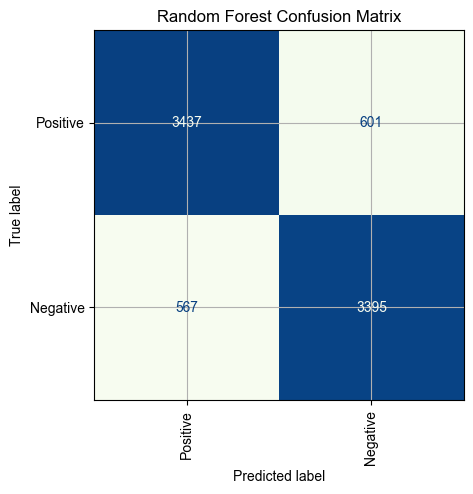

In [66]:
y_predRF = Random_Forest.predict(X_test_Vec)
ConfusionMatrixRF = confusion_matrix_(y_test = y_test, y_pred = y_predRF)
confusion_matrix_display(confusionmatrix = ConfusionMatrixRF, name = 'Random Forest')

In [67]:
False_PositiveRF, True_PositiveRF = false_true_positive(Confusin_Matrix = ConfusionMatrixRF)
False_NegativeRF, True_NegativeRF = false_true_negative(Confusin_Matrix = ConfusionMatrixRF)

In [68]:
AccuracyRF = accuracy_score(True_Positive = True_PositiveRF, True_Negative = True_NegativeRF, False_Positive =False_PositiveRF, False_Negative = False_NegativeRF)
PrecisionRF= precision_score(True_Positive = True_PositiveRF, False_Positive =False_PositiveRF)

SensitivityRF = sensitivity_score(True_Positive = True_PositiveRF,  False_Negative = False_NegativeRF)
SpecificityRF = specificity_score(True_Negative = True_NegativeRF, False_Positive = False_PositiveRF)

F1ScoreRF = f1_score(True_Positive = True_PositiveRF, False_Negative = False_NegativeRF, False_Positive = False_PositiveRF)
ErrorRF = error_rate(True_Positive = True_PositiveRF, True_Negative = True_NegativeRF, False_Positive =False_PositiveRF, False_Negative = False_NegativeRF)

In [69]:
performance_metrics_data_frame(Accuracy = AccuracyRF, Precision = PrecisionRF, Sensitivity = SensitivityRF, Specificity = SpecificityRF, F1Score = F1ScoreRF, Error = ErrorRF)

,Values
Accuracy,0.854000
Precision,0.851164
Sensitivity,0.858392
Specificity,0.849600
F1Score,0.854762
Error,0.146000


**6-SGD Classifier**

In [70]:
Algorithm = SGDClassifier(loss='hinge', )
SGD = machine_learning_model(algorithm=Algorithm)
fit_model(model=SGD, X_train=X_train_Vec, y_train=y_train)

SGDClassifier()

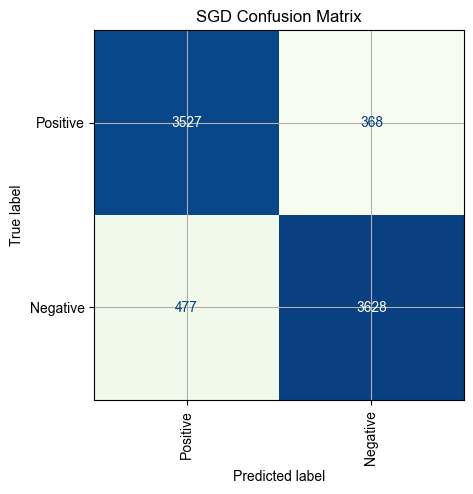

In [71]:
y_predSGD = SGD.predict(X_test_Vec)
ConfusionMatrixSGD = confusion_matrix_(y_test = y_test, y_pred = y_predSGD)
confusion_matrix_display(confusionmatrix = ConfusionMatrixSGD, name = 'SGD')

In [72]:
False_PositiveSGD, True_PositiveSGD = false_true_positive(Confusin_Matrix = ConfusionMatrixSGD)
False_NegativeSGD, True_NegativeSGD = false_true_negative(Confusin_Matrix = ConfusionMatrixSGD)

In [73]:
AccuracySGD = accuracy_score(True_Positive = True_PositiveSGD, True_Negative = True_NegativeSGD, False_Positive =False_PositiveSGD, False_Negative = False_NegativeSGD)
PrecisionSGD= precision_score(True_Positive = True_PositiveSGD, False_Positive =False_PositiveSGD)

SensitivitySGD = sensitivity_score(True_Positive = True_PositiveSGD,  False_Negative = False_NegativeSGD)
SpecificitySGD = specificity_score(True_Negative = True_NegativeSGD, False_Positive = False_PositiveSGD)

F1ScoreSGD = f1_score(True_Positive = True_PositiveSGD, False_Negative = False_NegativeSGD, False_Positive = False_PositiveSGD)
ErrorSGD = error_rate(True_Positive = True_PositiveSGD, True_Negative = True_NegativeSGD, False_Positive =False_PositiveSGD, False_Negative = False_NegativeSGD)

In [74]:
performance_metrics_data_frame(Accuracy = AccuracySGD, Precision = PrecisionSGD, Sensitivity = SensitivitySGD, Specificity = SpecificitySGD, F1Score = F1ScoreSGD, Error = ErrorSGD)

,Values
Accuracy,0.894375
Precision,0.905520
Sensitivity,0.880869
Specificity,0.907908
F1Score,0.893024
Error,0.105625


# Train Word2Vec

In [75]:
word_2_vec_(data = Data['Text'], vector_size=100, sg=0, name = 'EnglishWord2Vec100D')

# Deep Learning

**1.Preprocessing**

In [76]:
tokenizer, vocab_size, max_length, encoded_X_train , encoded_X_test, word_index = deeplearning_preprcosesing_(X_train=X_train, X_test=X_test, truncating='pre', padding='pre')

In [77]:
print('The Vocab Size Is :',vocab_size)
print('')
print('The Max Length Is :', max_length)

The Vocab Size Is : 112994

The Max Length Is : 1353


**2.Word Index**

In [78]:
Word_Index = word_index
Word_Index_ =pd.DataFrame(((list(Word_Index.items()))), columns=['Word', 'Index'])
Word_Index_.head()

,Word,Index
0,<oov>,1
1,movie,2
2,film,3
3,it,4
4,al,5


**3.Generate Word Vector**

In [79]:
path = 'EnglishWord2Vec100D.txt'
embedding_dim, word_vector = word_vector_(path, vocab_size, tokenizer)

# Deep Learing Models

**7-LSTM**

Epoch 1/10
1000/1000 [==============================] - 192s 189ms/step - loss: 0.4405 - accuracy: 0.7984 - val_loss: 0.3050 - val_accuracy: 0.8848 - lr: 0.0010
Epoch 2/10
1000/1000 [==============================] - 180s 180ms/step - loss: 0.2766 - accuracy: 0.8902 - val_loss: 0.2485 - val_accuracy: 0.8999 - lr: 0.0010
Epoch 3/10
1000/1000 [==============================] - 181s 181ms/step - loss: 0.2112 - accuracy: 0.9188 - val_loss: 0.2468 - val_accuracy: 0.9031 - lr: 0.0010
Epoch 4/10
1000/1000 [==============================] - 181s 181ms/step - loss: 0.1694 - accuracy: 0.9372 - val_loss: 0.3255 - val_accuracy: 0.9006 - lr: 0.0010
Epoch 5/10
1000/1000 [==============================] - 180s 180ms/step - loss: 0.1411 - accuracy: 0.9479 - val_loss: 0.2726 - val_accuracy: 0.9006 - lr: 0.0010
Epoch 6/10
1000/1000 [==============================] - 208s 208ms/step - loss: 0.1188 - accuracy: 0.9549 - val_loss: 0.2661 - val_accuracy: 0.8951 - lr: 0.0010
Epoch 7/10
1000/1000 [============

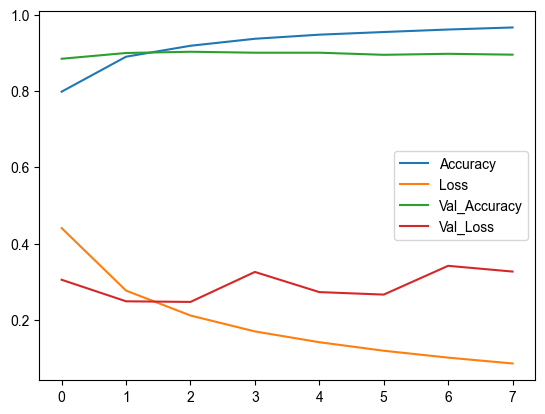

In [80]:
LSTM =lstm_(vocab_size= vocab_size + 1, embedding_dim= embedding_dim,  units1=32, dropout1=0.5, units2=32, dropout2=0.5, units3=32, dropout3=0.5, embeddings_matrix=word_vector)
model_compile(model=LSTM)
history = model_fit(model=LSTM, X_train=encoded_X_train, y_train=y_train, epochs=10, X_test=encoded_X_test, y_test=y_test, batch_size=32, name= 'LSTM')
plot_changes(histoty=history)  

**8-GRU**

Epoch 1/10
1000/1000 [==============================] - 298s 291ms/step - loss: 0.4159 - accuracy: 0.8006 - val_loss: 0.2770 - val_accuracy: 0.8829 - lr: 0.0010
Epoch 2/10
1000/1000 [==============================] - 273s 272ms/step - loss: 0.2379 - accuracy: 0.9053 - val_loss: 0.2395 - val_accuracy: 0.9003 - lr: 0.0010
Epoch 3/10
1000/1000 [==============================] - 274s 274ms/step - loss: 0.1858 - accuracy: 0.9279 - val_loss: 0.2462 - val_accuracy: 0.9065 - lr: 0.0010
Epoch 4/10
1000/1000 [==============================] - 279s 279ms/step - loss: 0.1500 - accuracy: 0.9442 - val_loss: 0.2440 - val_accuracy: 0.9070 - lr: 0.0010
Epoch 5/10
1000/1000 [==============================] - 285s 285ms/step - loss: 0.1234 - accuracy: 0.9555 - val_loss: 0.2581 - val_accuracy: 0.9051 - lr: 0.0010
Epoch 6/10
1000/1000 [==============================] - 295s 295ms/step - loss: 0.1020 - accuracy: 0.9645 - val_loss: 0.3011 - val_accuracy: 0.8946 - lr: 0.0010
Epoch 7/10
1000/1000 [============

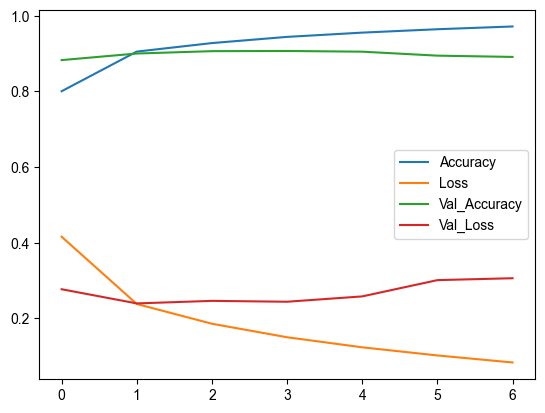

In [81]:
GRU_=gru_(vocab_size= vocab_size + 1, embedding_dim= embedding_dim,  units1=32, dropout1=0.3, units2=32, dropout2=0.3, units3=32, dropout3=0.0, embeddings_matrix=word_vector)
model_compile(model=GRU_)
history = model_fit(model=GRU_, X_train=encoded_X_train, y_train=y_train, epochs=10, X_test=encoded_X_test, y_test=y_test, batch_size=32, name='GRU')
plot_changes(histoty=history)